# **Using Networkx**

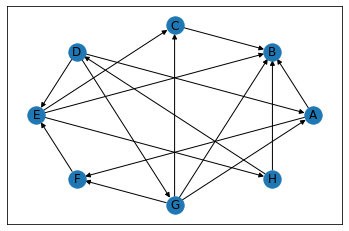

The page ranks are :

The Pages in the order of importance with the page rank scores obtained b y using NetworkX are : 
B = 0.28120563198030324
E = 0.1606990303925196
C = 0.10983011816321761
F = 0.10229957241772619
H = 0.09415966695368949
A = 0.08941499371129827
D = 0.08864644387947536
G = 0.07374454250177016


In [20]:

adjacency_matrix = [

[0, 1, 0, 0, 0, 1, 0, 0],

[0, 0, 0, 0, 0, 0, 0, 0],

[0, 1, 0, 0, 0, 0, 0, 0],

[1, 0, 0, 0, 1, 0, 1, 0],

[0, 1, 1, 0, 0, 0, 0, 1],

[0, 0, 0, 0, 1, 0, 0, 0],

[1, 1, 1, 0, 0, 1, 0, 0],

[0, 1, 0, 1, 0, 0, 0, 0]
]

num_vertices = 8

# list of nodes

vertices_list = ['A', 'B', 'C', 'D', 'E', 'F','G','H']

# Import the Networkx Library for forming the 
import networkx as nx

# Import the Pyplot library for plotting the created graph 
from matplotlib import pyplot as plt

# Create an instance of the Graph class

# We are using a Directed graph due to the nature of our problem.

graph = nx.DiGraph()

# Load the nodes into the graph

graph.add_nodes_from(vertices_list)

# Add the edges from the adjacency matrix

for i in range(num_vertices) :

  for j in range(num_vertices) :

    if adjacency_matrix[i][j] == 1 :

      graph.add_edge(vertices_list[i], vertices_list[j])

# Draw generated graph

nx.draw_networkx(graph, pos=nx.circular_layout(graph), arrows=True, with_labels= True)

plt.show()

# Compute the page ranks

page_ranks_networkx = nx.pagerank(graph, alpha=0.85) 
print("The page ranks are :\n") 
page_ranks_networkx

# Sort the pages by their ranks

page_ranks_networkx = dict(sorted(page_ranks_networkx.items(), key=lambda item:

item[1], reverse=True))

page_ranks_networkx

# Print the pages by the order of their ranks

print("The Pages in the order of importance with the page rank scores obtained b y using NetworkX are : ")

for k, v in page_ranks_networkx.items() :

  print(k, "=", v)







# **Random Walk**

In [32]:


# Calculate the number of out-bound links for each vertex

out_bound_vertices_count = [0 for _ in range(num_vertices)]

for i in range(num_vertices) :

  out_bound_vertices_count[i] = sum(adjacency_matrix[i])

out_bound_vertices_count


print("The Out-Bound vertices count for each vertex is as follows : ")

for i in range(num_vertices) :

  print(vertices_list[i], " : ", out_bound_vertices_count[i])


# List and store all the in-bound vertices for a particular vertex

in_bound_vertices_list = {}

for i in range(num_vertices) :

  in_bound_vertices_list[i] = []

  for j in range(num_vertices) :

    if adjacency_matrix[j][i] == 1 :

      in_bound_vertices_list[i].append(j)

in_bound_vertices_list


print("\nThe In-bound vertices for each vertex is as follows : ")

for i in range(num_vertices) :

  print(vertices_list[i], " : ", end="")

  print(", ".join([vertices_list[j] for j in in_bound_vertices_list[i]]))


def pageRank(graph, vertices_names, in_bound_vertices_list, out_bound_vertices_count, tolerance=1.0e-6, max_iterations=100) :
  num_vertices = len(vertices_names)
  page_rank = [(1/num_vertices) for _ in range(num_vertices)]
  epsilon = num_vertices * tolerance

  # Start the algorithm

  converged = False

  for i in range(max_iterations) :
    page_rank_old = page_rank[:]
    for j in range(num_vertices) : 
      page_rank[j] = 0
      for k in in_bound_vertices_list[j] :
        page_rank[j] += page_rank_old[k] / out_bound_vertices_count[k]

    error = sum([abs(page_rank[j] - page_rank_old[j]) for j in range(num_vertices)])

    if error < epsilon :
      converged = True
      break

  # Return the solution, only if convergence has taken place 
  if converged :

    page_rank_manual = {}

    for i, pr in enumerate(page_rank) :

      page_rank_manual[vertices_names[i]] = pr

    return page_rank_manual

page_rank_manual = pageRank(graph, vertices_list, in_bound_vertices_list, out_bound_vertices_count)

page_rank_manual

# Sort the pages by their ranks

page_rank_manual = dict(sorted(page_rank_manual.items(), key=lambda item: item[1], reverse=True))

page_rank_manual

# Print the pages by the order of their ranks

print("\nThe Pages in the order of importance with the page rank scores obtained b y performing Random Walk are : ")

for k, v in page_rank_manual.items() :

  print(k, "=", v)


The Out-Bound vertices count for each vertex is as follows : 
A  :  2
B  :  0
C  :  1
D  :  3
E  :  3
F  :  1
G  :  4
H  :  2

The In-bound vertices for each vertex is as follows : 
A  : D, G
B  : A, C, E, G, H
C  : E, G
D  : H
E  : D, F
F  : A, G
G  : D
H  : E

The Pages in the order of importance with the page rank scores obtained b y performing Random Walk are : 
B = 3.82433438572732e-06
E = 1.4964646055945424e-06
C = 1.00735866138683e-06
H = 8.437536388458218e-07
D = 6.873407767188322e-07
F = 6.333961839903499e-07
A = 5.563153515756733e-07
G = 3.9271032903466525e-07
